# Marcos Cesar Ribeiro de Camargo - 9278045
## 22/08/2018 - Exercício 1

## Bibliotecas utilizadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implementação do modelo de Perceptron Adaline

In [45]:
class Perceptron(object):
    weights = None
    
    def f(self, net, threshold=0.5):
        if(net >= threshold):
            return 1
        else:
            return -1

    def predict(self, x):
        X = np.concatenate((x, [1]))
        net = np.sum(np.multiply(X, self.weights))
        return(self.f(net))
    
    def train(self, X, Y, eta=0.05, threshold=10e-3, max_iter=2000):
        n, w = X.shape
        # Gerando pesos w e theta aleatóriamente 
        weights = (np.random.rand(w+1) - 0.5)
        
        t_error = 2*threshold
        counter = 0
        while(t_error > threshold and counter <= max_iter):
            t_error = 0
            # Para toda linha do conjuto de treinamento
            for i in range(n):

                # Concatenando X[i] com 1 para o theta
                Xi = np.concatenate((X[i], [1]))

                # Calculando net
                net = np.sum(np.multiply(Xi, weights))
                y_hat = self.f(net)

                # Calculando erro
                error = Y[i] - y_hat
                t_error = t_error + np.power(error, 2)

                # Treinando
                # Calculando o gradiente
                dE2_dweights = -2*error*Xi
                weights = weights - eta*dE2_dweights
            t_error = t_error/n
            counter = counter + 1
        self.weights = weights

In [83]:
import random

A   = [-1, -1, +1, -1, -1, -1, +1, -1, +1, -1, -1, +1, +1, +1, -1, +1, -1, -1, -1, +1, +1, -1, -1, -1, +1]
A_I = [+1, -1, -1, -1, +1, +1, -1, -1, -1, +1, -1, +1, +1, +1, -1, -1, +1, -1, +1, -1, -1, -1, +1, -1, -1]

As = []
A_Is = []

As.append(A)
A_Is.append(A_I)
for i in range(5):
    temp = A.copy()
    pos = random.randint(0, len(A)-1)
    temp[pos] = temp[pos]*-1
    As.append(temp)

    temp = A_I.copy()
    pos = random.randint(0, len(A_Is)-1)
    temp[pos] = temp[pos]*-1
    A_Is.append(temp)
    


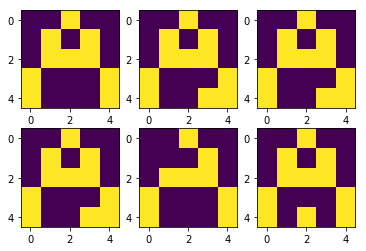

In [86]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    ax1 = fig.add_subplot(2,3, i+1)
    ax1.imshow(np.array(As[i]).reshape((5,5)))


to_save = np.array(As).astype(np.int)
np.savetxt('A.data', to_save, fmt='%i')

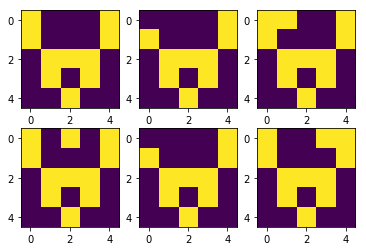

In [87]:
fig = plt.figure()
for i in range(6):
    ax1 = fig.add_subplot(2,3, i+1)
    ax1.imshow(np.array(A_Is[i]).reshape((5,5)))

to_save = np.array(A_Is).astype(np.int)
np.savetxt('A_I.data', to_save, fmt='%i')

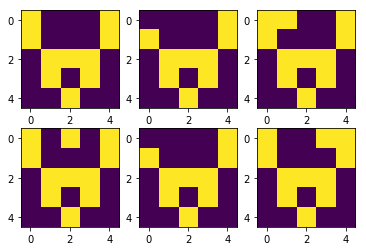

In [16]:
A_Is = np.loadtxt('A_I.data')
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(A_Is.shape[0]):
    ax1 = fig.add_subplot(2,3, i+1)
    ax1.imshow(np.array(A_Is[i]).reshape((5,5)))

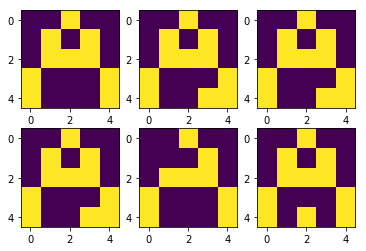

In [17]:
As = np.loadtxt('A.data')
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(As.shape[0]):
    ax1 = fig.add_subplot(2,3, i+1)
    ax1.imshow(np.array(As[i]).reshape((5,5)))

-1
1


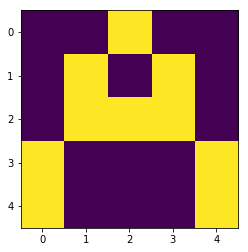

In [46]:
X = As.copy()
X = np.append(X, A_Is)

Y = np.array([-1, -1, -1, -1, -1, -1, +1, +1, +1, +1, +1, +1])
X = X.reshape((12, 25))
plt.imshow(X[0].reshape((5,5)))
P = Perceptron()
P.train(X, Y)

print(P.predict(As[0]))
print(P.predict(A_Is[0]))
